# Intro

A client want to know how much money is needed for his/her dream house, with area of 2400 sqft, 4 bedrooms, 2 bathrooms, high grade of around 10, perfect view, perfect condition, and built around 2010. From the dataset of house sales, we will try to predict the price using Multivariate Linear Regression.

# Load The Library and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load only the features needed
data = pd.read_csv('dataset/kc_house_data.csv', usecols = ['price','sqft_living','bedrooms','bathrooms','grade','view','condition','yr_built'])
data.head()

,price,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built
0,221900.0,3,1.00,1180,0,3,7,1955
1,538000.0,3,2.25,2570,0,3,7,1951
2,180000.0,2,1.00,770,0,3,6,1933
3,604000.0,4,3.00,1960,0,5,7,1965
4,510000.0,3,2.00,1680,0,3,8,1987


## Data Preparation

In this part, we'll see if there are anything we should clean.

In [3]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,view,condition,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,0.234303,3.409430,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,0.766318,0.650743,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,0.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,4.000000,5.000000,13.000000,2015.000000


The value of 33 for 'bedrooms' feature is most likely an error/typo. Let's change it to 3.

In [4]:
data['bedrooms'] = data['bedrooms'].replace(33,3)

In [5]:
# checking for missing values
data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
view           0
condition      0
grade          0
yr_built       0
dtype: int64

No missing values. Good.

# Exploratory Data Analysis

## Distribution of each features

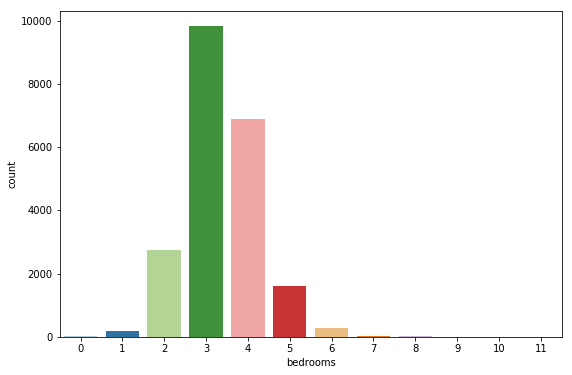

In [6]:
# bedrooms
bed = plt.figure(figsize=(9,6))
sns.countplot(data['bedrooms'], palette='Paired')
plt.show()

Most houses have 3 and 4 bedrooms.

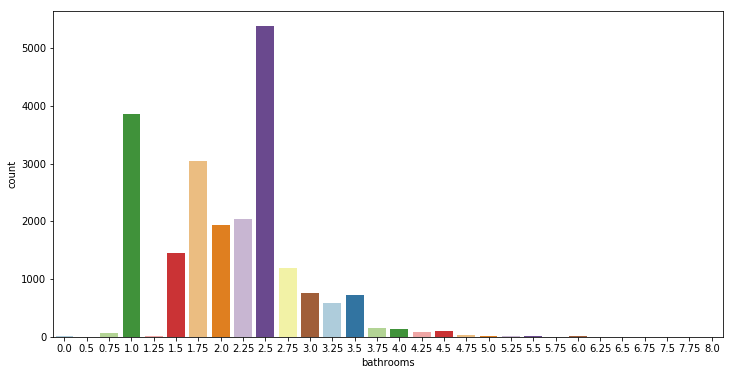

In [7]:
# bathrooms
bath = plt.figure(figsize=(12,6))
sns.countplot(data['bathrooms'], palette='Paired')
plt.show()

Most houses have 2.5 bathrooms (2 full bathrooms and 1 bathroom with no shower) and 1 bathroom.

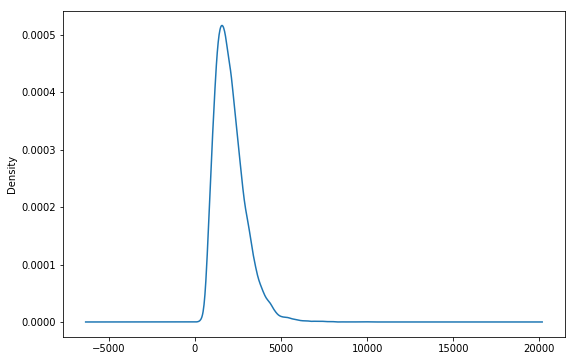

In [8]:
# sqft_living
area = plt.figure(figsize=(9,6))
data['sqft_living'].plot(kind='kde')
plt.show()

Most houses have area of about 2000 sqft.

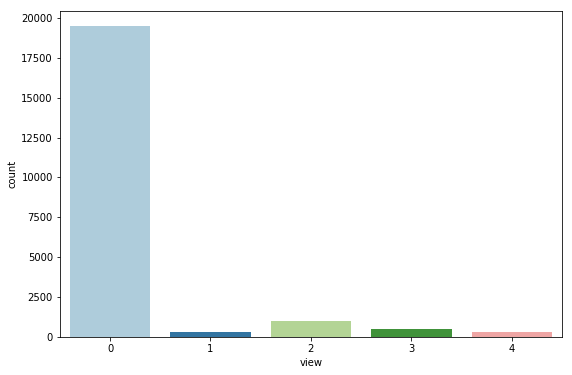

In [9]:
# view
v = plt.figure(figsize=(9,6))
sns.countplot(data['view'], palette='Paired')
plt.show()

Most houses doesn't have special view.

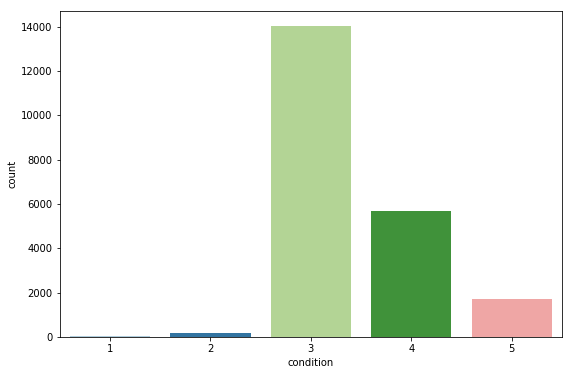

In [10]:
# condition
c = plt.figure(figsize=(9,6))
sns.countplot(data['condition'], palette='Paired')
plt.show()

Most houses have average condition.

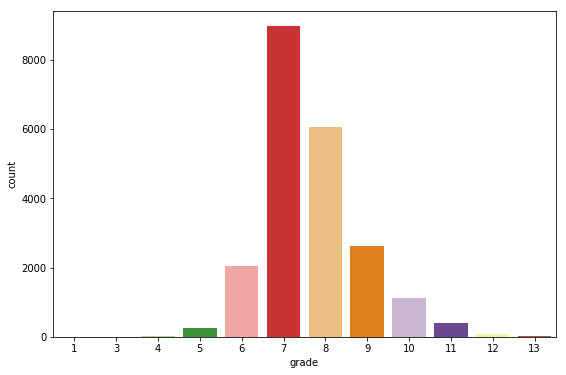

In [11]:
# grade
g = plt.figure(figsize=(9,6))
sns.countplot(data['grade'], palette='Paired')
plt.show()

And also average grade.

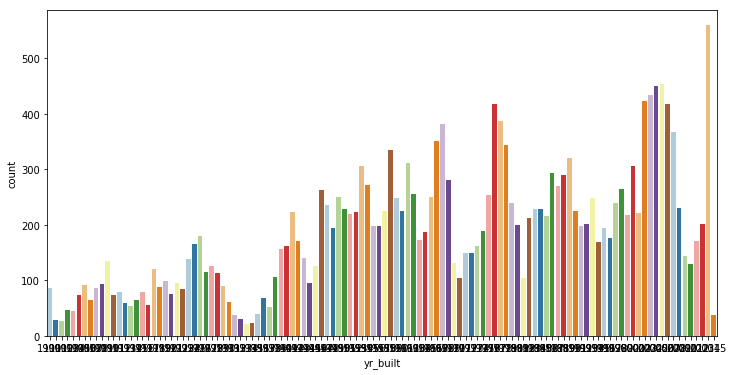

In [12]:
# yr_built
yr = plt.figure(figsize=(12,6))
sns.countplot(data['yr_built'], palette='Paired')
plt.show()

### Scatterplot of each features to price

<Figure size 1296x648 with 0 Axes>

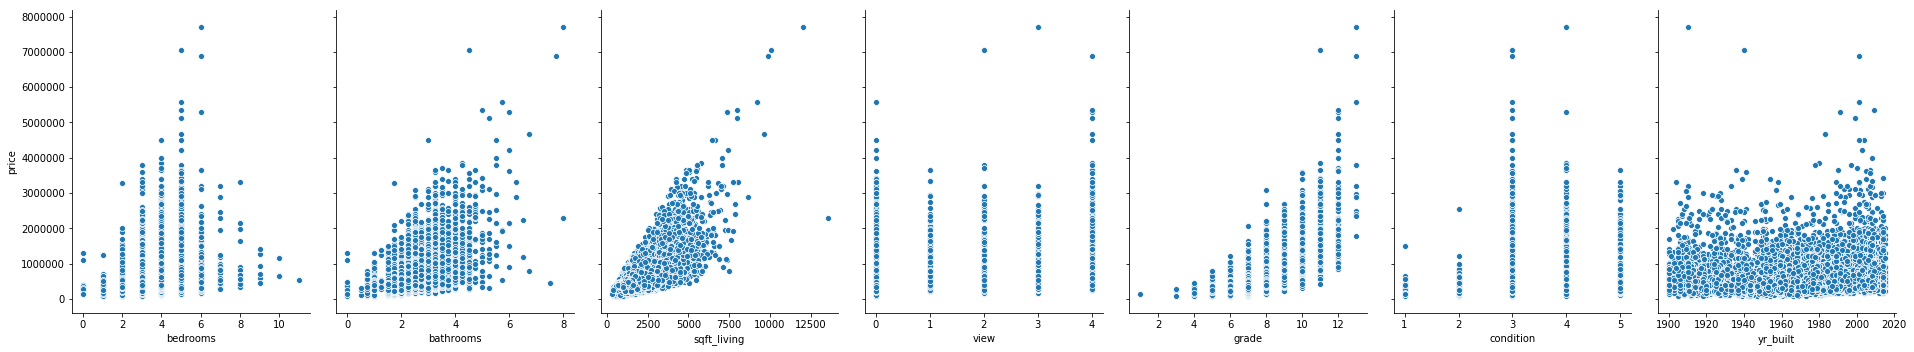

In [13]:
plt.figure(figsize=(18,9))
sns.pairplot(data, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'condition', 'yr_built'], y_vars=['price'], height=5, aspect=0.75)
plt.show()

## Correlation of each features to price

First, we'll check the correlation of all features to each other.

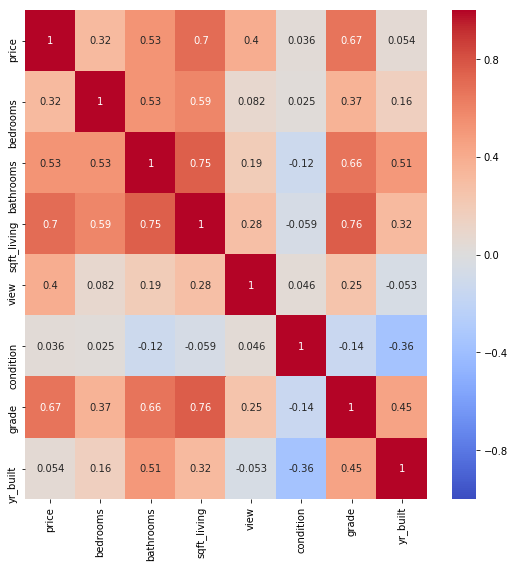

In [14]:
corr = data.corr()

plt.figure(figsize=(9,9))
sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True);

Now, we're focusing on the correlation of each features to price.

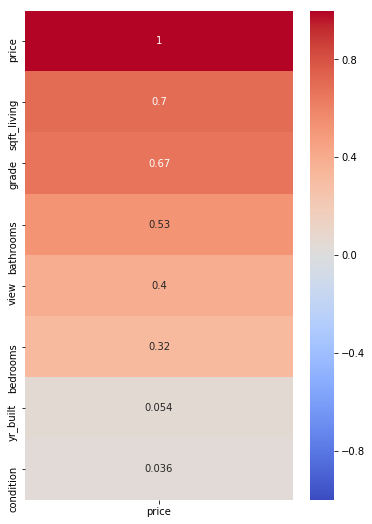

In [15]:
plt.figure(figsize=(6,9))
sns.heatmap(corr[['price']].sort_values(by=['price'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

All the features used have positive correlation to price. That's good. With the highest correlation to price is sqft_living, grade, and bathrooms. The bigger the area, the higher the price of the house. The lowest correlation to price, condition and yr_built, meaning that the condition and age of the house doesn't mean much for the house price.

# Modelling

We're using Multivariate Linear Regression, like a normal Linear Regression but using more than 1 variable

In [16]:
# x & y
x = data.drop(columns='price')
y = data['price']

In [17]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
# check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 7)
(17290,)
(4323, 7)
(4323,)


In [18]:
# linear regression
linReg = LinearRegression()
linReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# prediction using linear regression
y_pred = linReg.predict(x_test)

In [20]:
# the score (R^2) of the model
linReg.score(x_test, y_test)

0.6334926506870288

# Prediction

In [21]:
# input all the features value
linReg.predict([[4,2,2400,4,5,10,2010]])

array([989111.70371707])

# Conclusion

We'll going to report to the client saying that he/she needs about 989K US$ for his/her dream house.